## Scaling Fucntion

In [1]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

# Function to scale all columns in a DataFrame
def scale_all_dataframe(data: DataFrame) -> DataFrame:
    vars: list[str] = data.columns.to_list()  # Get column names
    transf: StandardScaler = StandardScaler().fit(data)  # Fit StandardScaler
    df = DataFrame(transf.transform(data), index=data.index)  # Transform data
    df.columns = vars  # Assign column names back
    return df


## Load and Visualize the Original Dataset

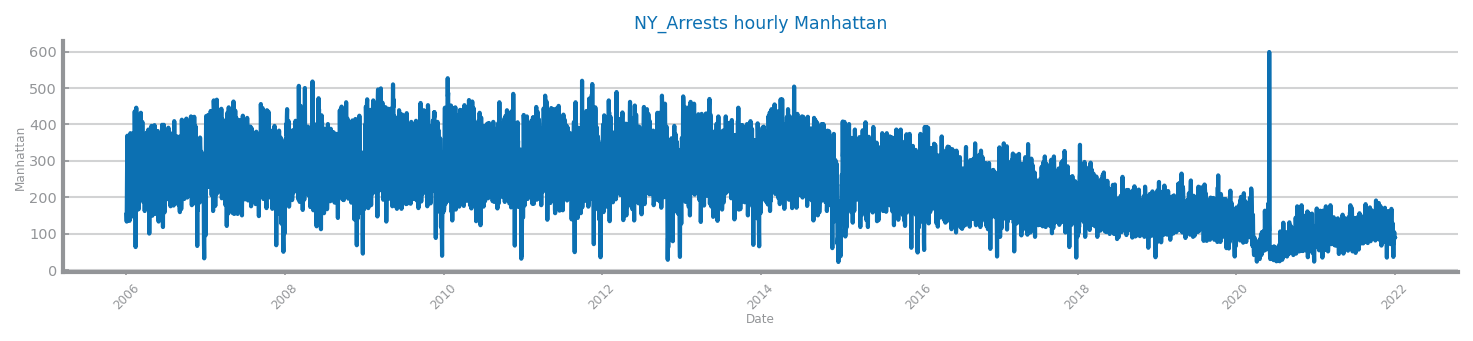

In [ ]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "NY_Arrests"
filename = "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/forecast_ny_arrests.csv"
index = "Date"
target = "Manhattan"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Date column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Visualize the original target variable
series: Series = data[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
show()


## Apply Scaling

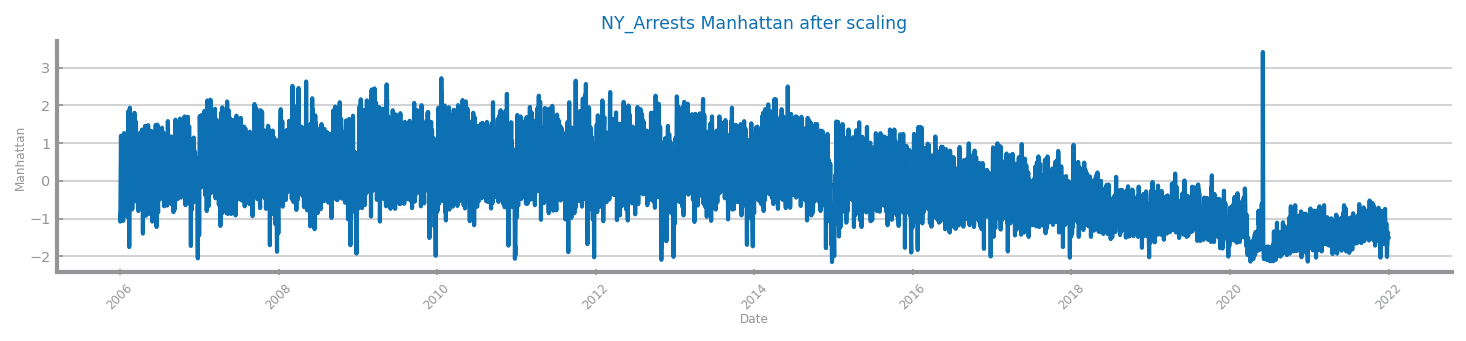

In [4]:
# Scale all variables in the dataset
df_scaled: DataFrame = scale_all_dataframe(data)

# Extract the scaled target variable
ss: Series = df_scaled[target]

# Visualize the scaled target variable
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss.index.to_list(),
    ss.to_list(),
    xlabel=ss.index.name,
    ylabel=target,
    title=f"{file_tag} {target} after scaling",
)
show()
